(<Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1500x600 with 2 Axes>)

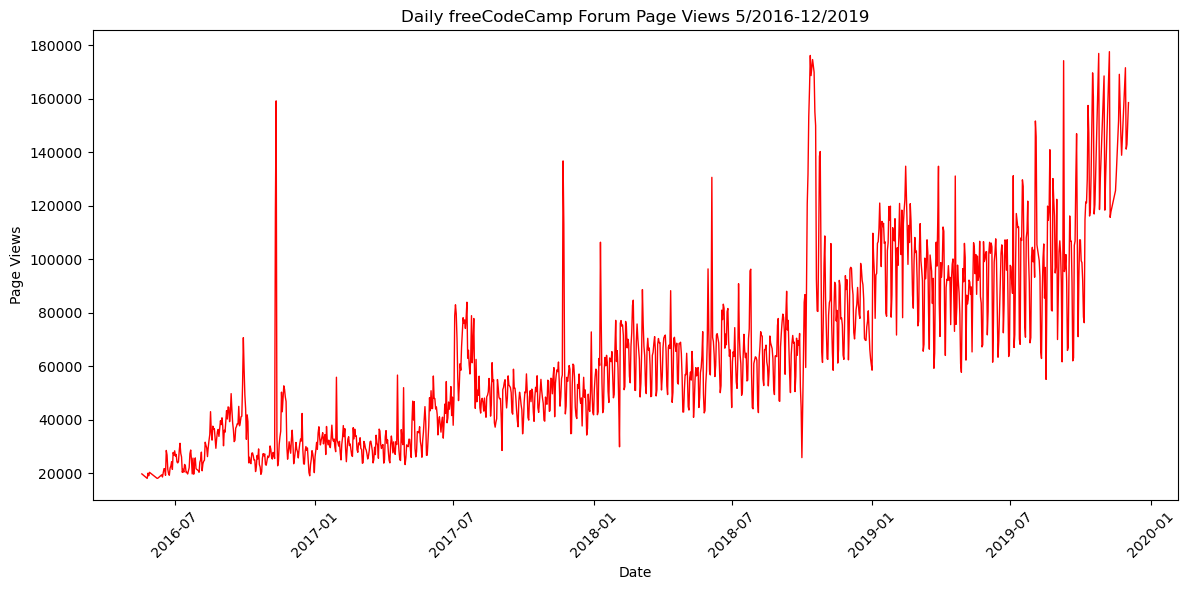

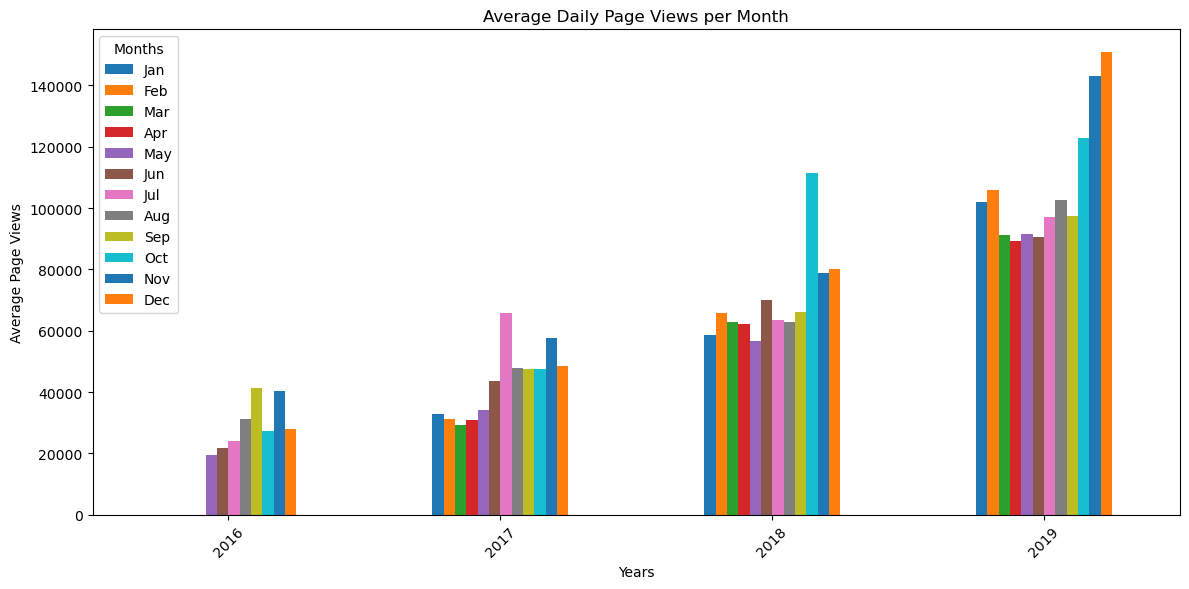

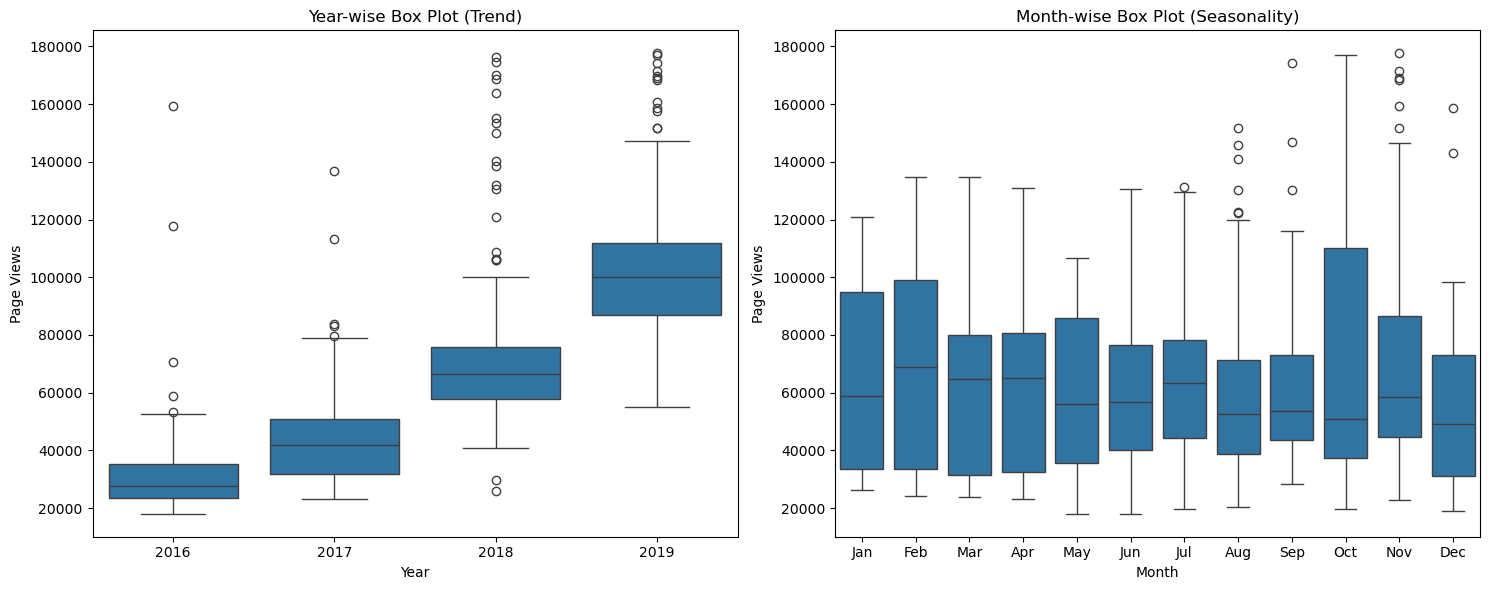

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean the data
lower_quantile = df['value'].quantile(0.025)
upper_quantile = df['value'].quantile(0.975)
df_clean = df[(df['value'] >= lower_quantile) & (df['value'] <= upper_quantile)]

# Function to draw line plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df_clean.index, df_clean['value'], color='r', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/Users/anks/Jupyter Files/Graphs/line_plot.png')
    return fig

# Function to draw bar plot
def draw_bar_plot():
    df_bar = df_clean.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    fig = df_bar.plot(kind='bar', figsize=(12, 6), legend=True).figure
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/Users/anks/Jupyter Files/Graphs/bar_plot.png')
    return fig

# Function to draw box plot
def draw_box_plot():
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    sns.boxplot(x='month', y='value', data=df_box, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    
    plt.tight_layout()
    plt.savefig('/Users/anks/Jupyter Files/Graphs/box_plot.png')
    return fig

# Drawing the plots
line_plot_fig = draw_line_plot()
bar_plot_fig = draw_bar_plot()
box_plot_fig = draw_box_plot()

line_plot_fig, bar_plot_fig, box_plot_fig
